In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# redefinir los nombres de las columnas y los tipos de datos
dtype_spec_test = {
    'column_6_name': 'str',  # Replace 'column_6_name' with the actual name of column 6 in merged_test.csv
}

dtype_spec_train = {
    'column_7_name': 'str',  # Replace 'column_7_name' with the actual name of column 7 in merged_train.csv
}

# cargar los datos
merged_test = pd.read_csv('merged_test.csv', dtype=dtype_spec_test, low_memory=False)
merged_train = pd.read_csv('merged_train.csv', dtype=dtype_spec_train, low_memory=False)


In [18]:
merged_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [19]:
merged_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [20]:
# Basic Information
print("Basic Information:")
print(merged_train.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float6

In [45]:
#pasar las columnas de tipo object a float
# Verifica y convierte las columnas numéricas al tipo adecuado
for column in merged_train.columns:
    if merged_train[column].dtype == 'object':
        try:
            merged_train[column] = merged_train[column].astype(float)
        except ValueError:
            pass  # Si no se puede convertir, se ignora
        
        

In [47]:
# Ajusta las opciones de visualización de pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Calcula las estadísticas descriptivas nuevamente
print("\nSummary Statistics:")
print(merged_train.describe())


Summary Statistics:
           Store                           Date      Sales  Customers  \
count 1017209.00                        1017209 1017209.00 1017209.00   
mean      558.43  2014-04-11 01:30:42.846061824    5773.82     633.15   
min         1.00            2013-01-01 00:00:00       0.00       0.00   
25%       280.00            2013-08-17 00:00:00    3727.00     405.00   
50%       558.00            2014-04-02 00:00:00    5744.00     609.00   
75%       838.00            2014-12-12 00:00:00    7856.00     837.00   
max      1115.00            2015-07-31 00:00:00   41551.00    7388.00   
std       321.91                            NaN    3849.93     464.41   

            Open      Promo  SchoolHoliday  CompetitionDistance  \
count 1017209.00 1017209.00     1017209.00           1014567.00   
mean        0.83       0.38           0.18              5430.09   
min         0.00       0.00           0.00                20.00   
25%         1.00       0.00           0.00           

In [22]:
# Check for Missing Values
print("\nMissing Values:")
print(merged_train.isnull().sum())


Missing Values:
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64



Data Distribution:


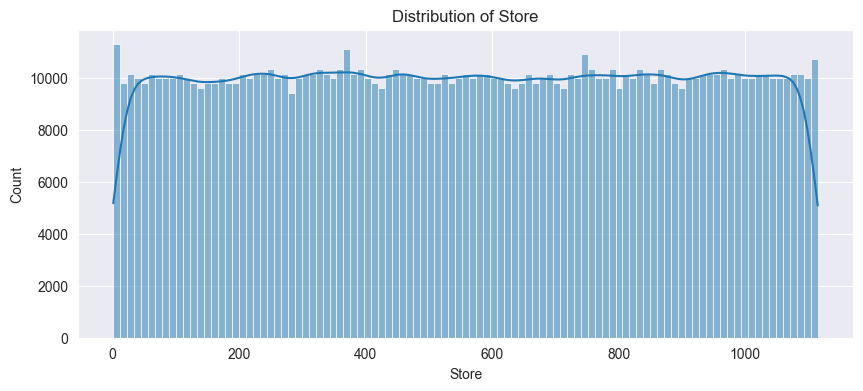

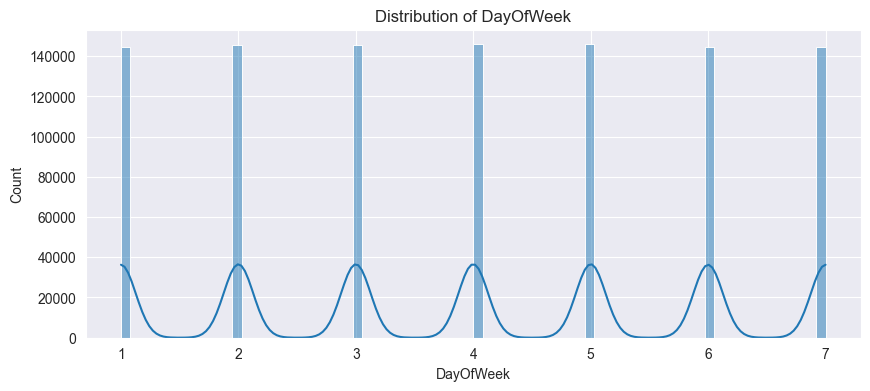

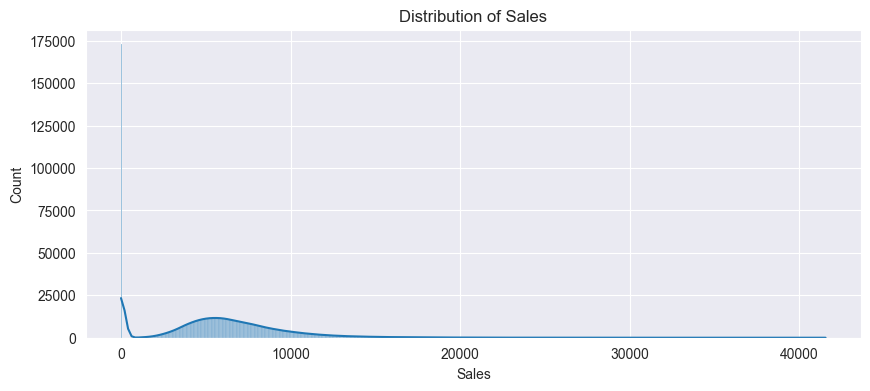

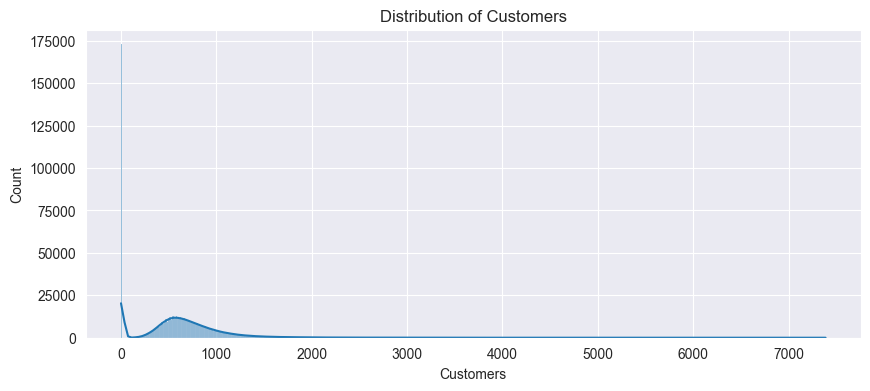

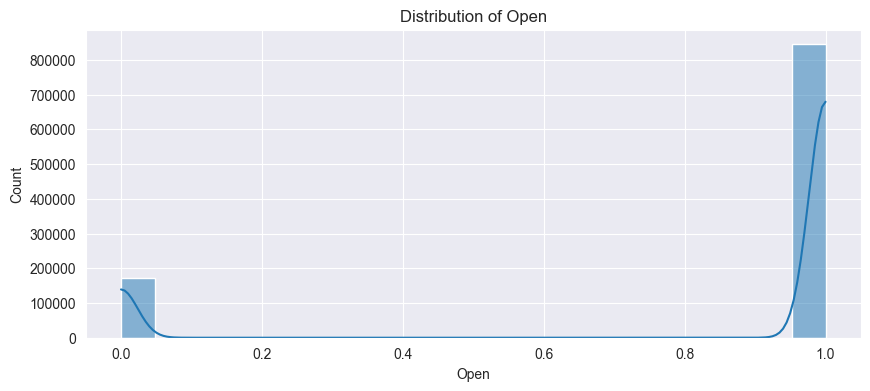

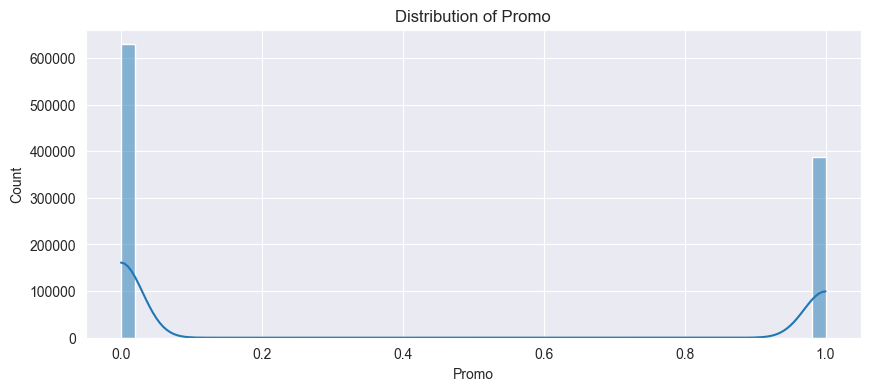

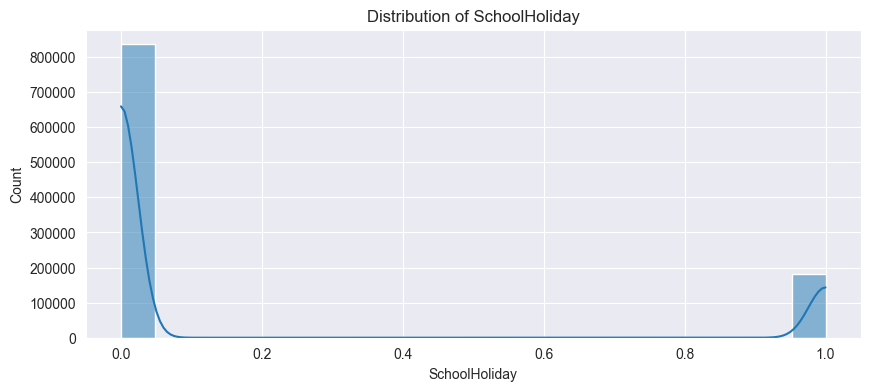

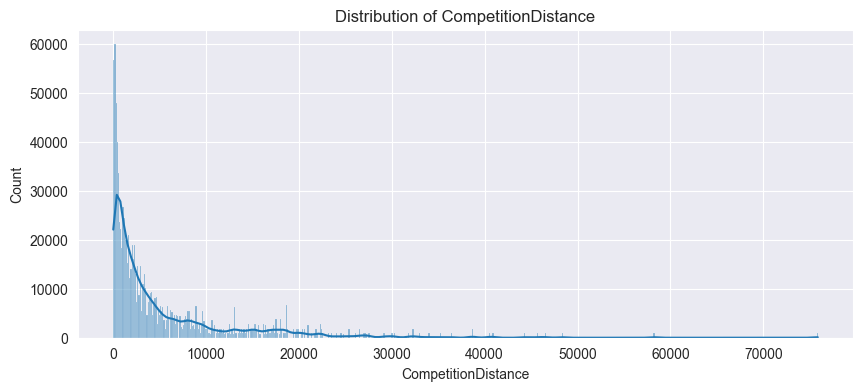

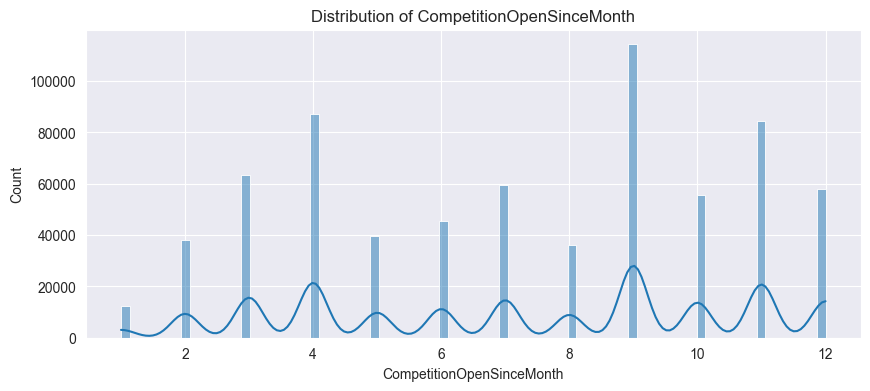

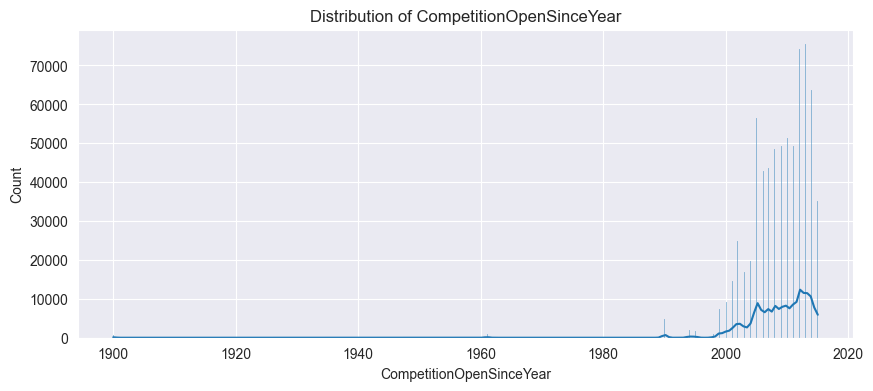

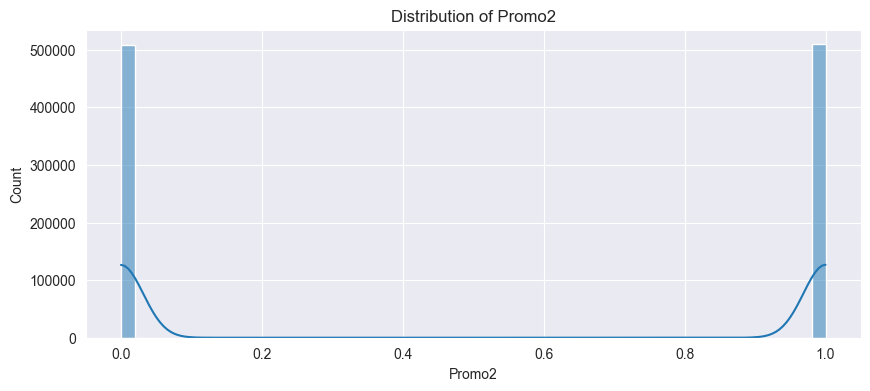

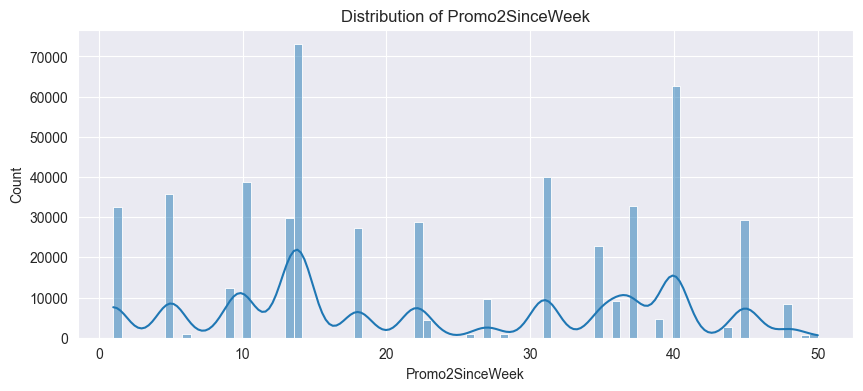

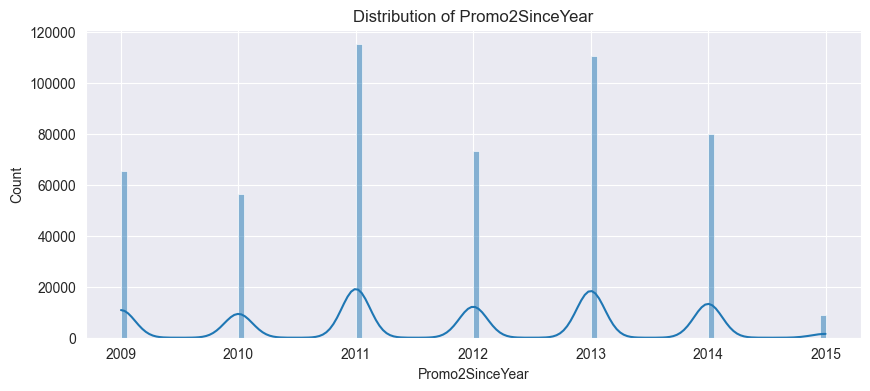

In [23]:
# Data Distribution
print("\nData Distribution:")
for column in merged_train.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(merged_train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


Correlation Analysis:


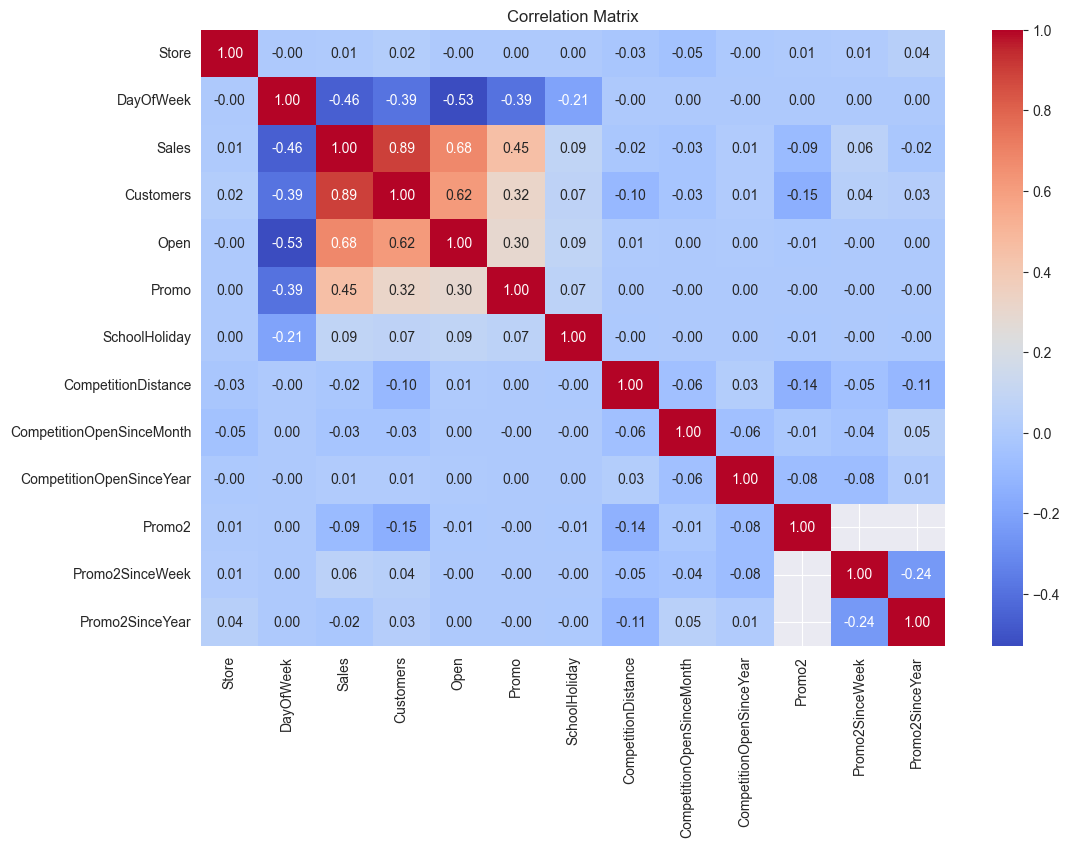

In [25]:
# Correlation Analysis
print("\nCorrelation Analysis:")
plt.figure(figsize=(12, 8))
numeric_columns = merged_train.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/3013035520.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_day.index, y=avg_sales_by_day.values, palette='viridis')


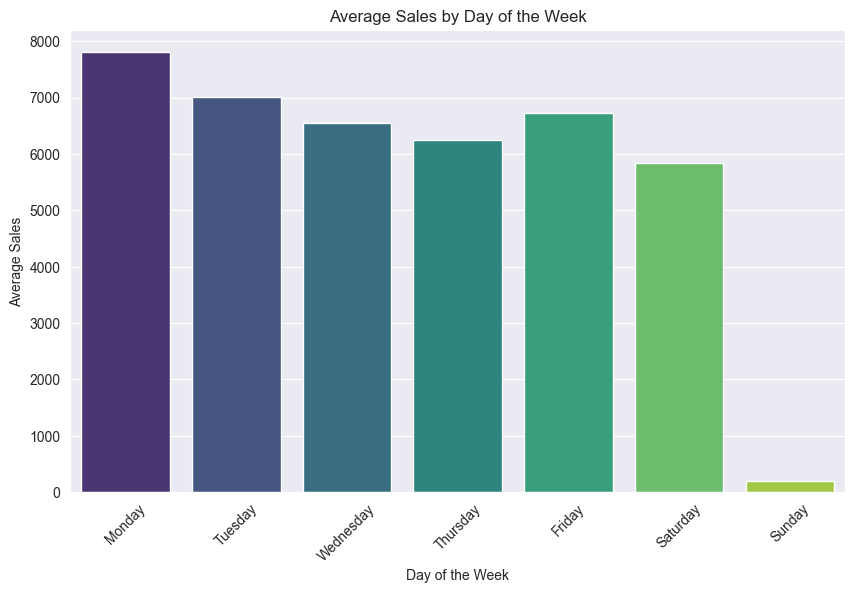

In [26]:
# Convert 'Date' column to datetime if it's not already
merged_train['Date'] = pd.to_datetime(merged_train['Date'])

# Extract day of the week from the 'Date' column
merged_train['DayOfWeek'] = merged_train['Date'].dt.day_name()

# Group by 'DayOfWeek' and calculate average sales
avg_sales_by_day = merged_train.groupby('DayOfWeek')['Sales'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot average sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_day.index, y=avg_sales_by_day.values, palette='viridis')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

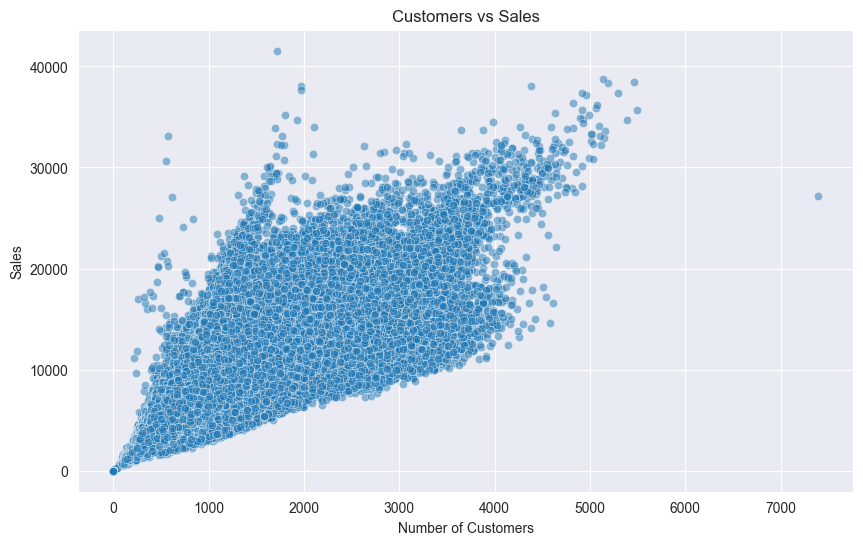

Correlation Coefficient between Customers and Sales: 0.89


In [27]:
# Scatter Plot of Customers vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=merged_train, alpha=0.5)
plt.title('Customers vs Sales')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

# Calculate Correlation Coefficient
correlation_coefficient = merged_train['Customers'].corr(merged_train['Sales'])
print(f'Correlation Coefficient between Customers and Sales: {correlation_coefficient:.2f}')

/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/731730580.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='StoreType', y='Sales', data=merged_train, palette='viridis')


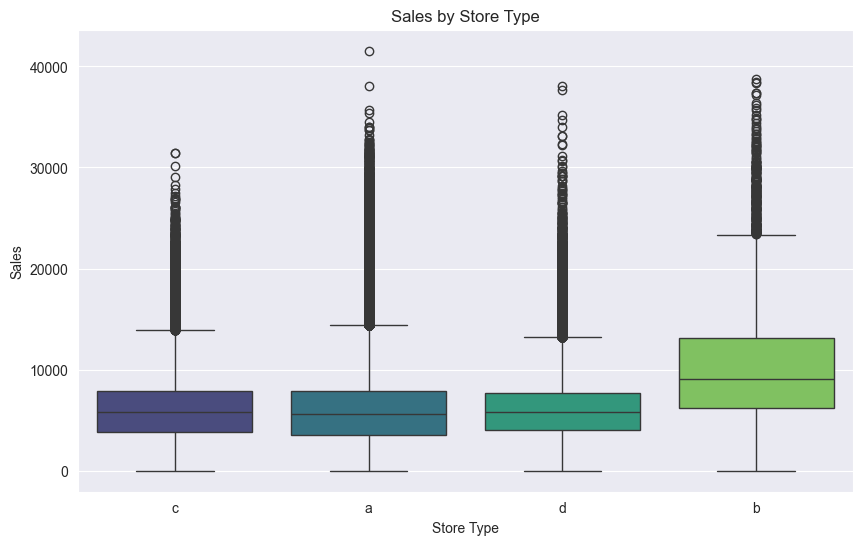

In [28]:
# Box Plot of Sales by Store Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='Sales', data=merged_train, palette='viridis')
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()


/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/1880709278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Assortment', y='Sales', data=merged_train, palette='viridis')


Text(0, 0.5, 'Sales')

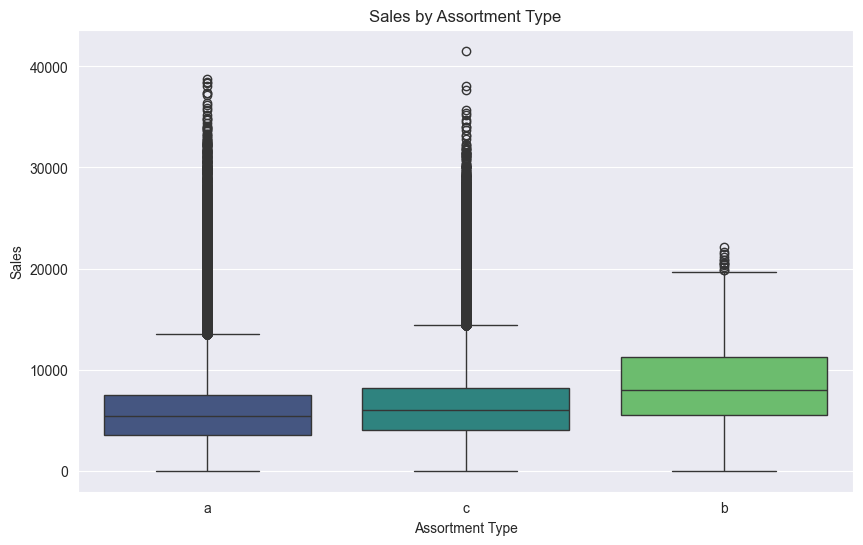

In [29]:
# Box Plot of Sales by Assortment Type 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Assortment', y='Sales', data=merged_train, palette='viridis')
plt.title('Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')


/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/2211391209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promo2', y='Sales', data=merged_train, palette='viridis')


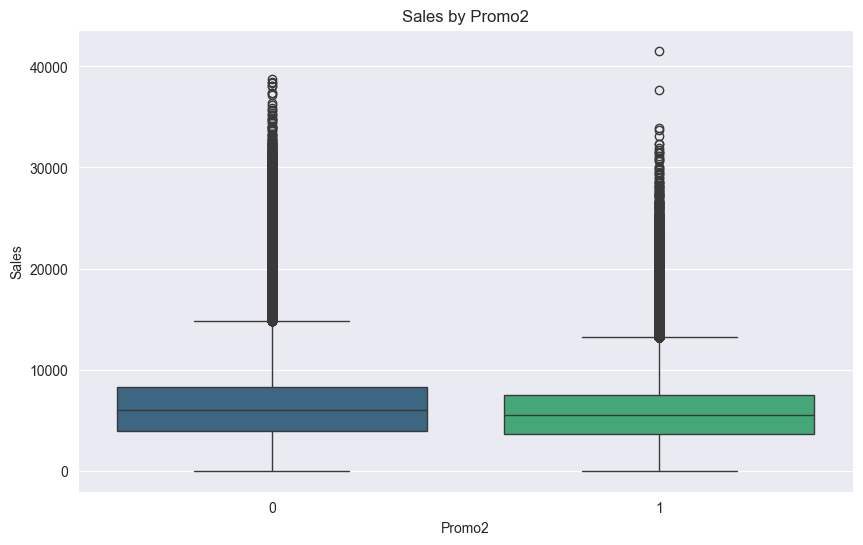

In [30]:
# Box Plot of Sales by Promo2
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo2', y='Sales', data=merged_train, palette='viridis')
plt.title('Sales by Promo2')
plt.xlabel('Promo2')
plt.ylabel('Sales')
plt.show()


/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/3902469603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PromoInterval', y='Sales', data=merged_train, palette='viridis')


([0, 1, 2],
 [Text(0, 0, 'Jan,Apr,Jul,Oct'),
  Text(1, 0, 'Feb,May,Aug,Nov'),
  Text(2, 0, 'Mar,Jun,Sept,Dec')])

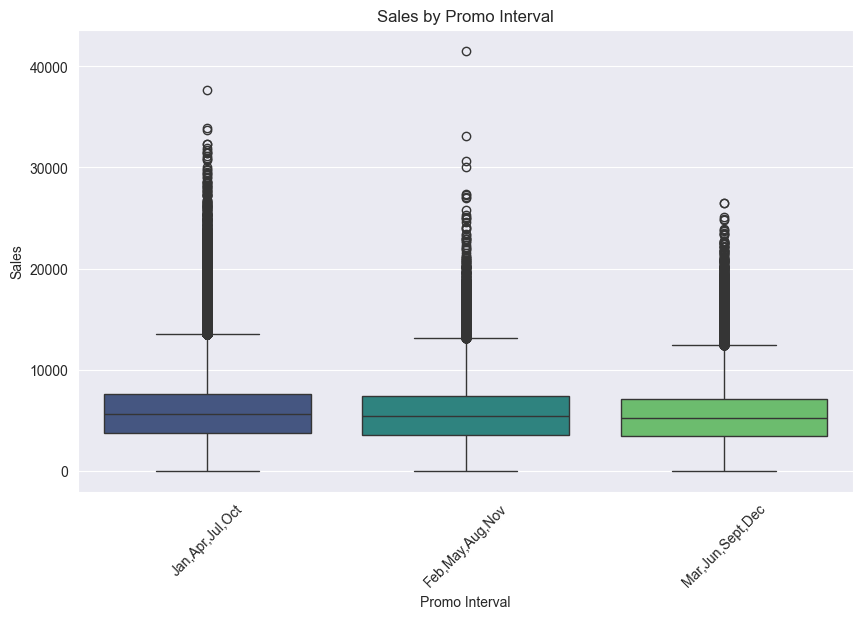

In [31]:
# Box Plot of Sales by Promo Interval
plt.figure(figsize=(10, 6))
sns.boxplot(x='PromoInterval', y='Sales', data=merged_train, palette='viridis')
plt.title('Sales by Promo Interval')
plt.xlabel('Promo Interval')
plt.ylabel('Sales')
plt.xticks(rotation=45)


/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/2448673752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SchoolHoliday', y='Sales', data=merged_train, palette='viridis')


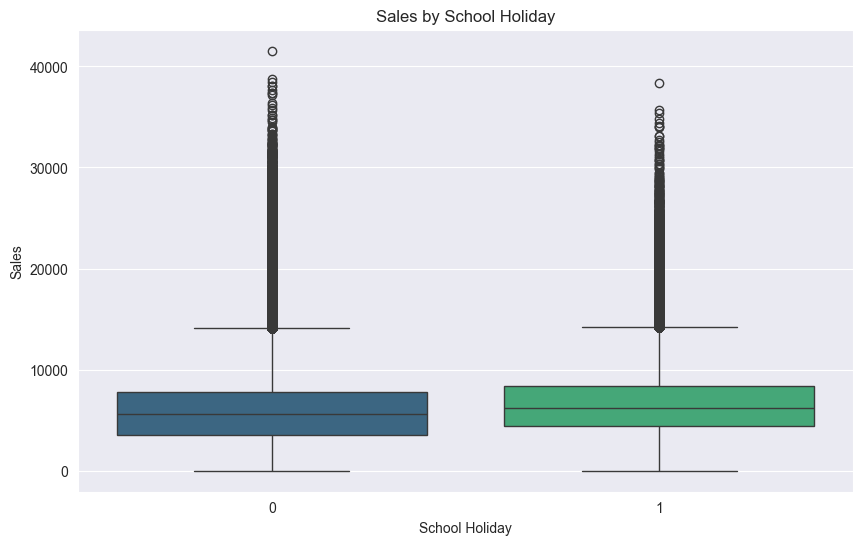

In [32]:
# Box Plot of Sales by School Holiday
plt.figure(figsize=(10, 6))
sns.boxplot(x='SchoolHoliday', y='Sales', data=merged_train, palette='viridis')
plt.title('Sales by School Holiday')
plt.xlabel('School Holiday')
plt.ylabel('Sales')
plt.show()


/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/2492033864.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_customers_by_promo.index, y=avg_sales_customers_by_promo['Sales'], palette='viridis')


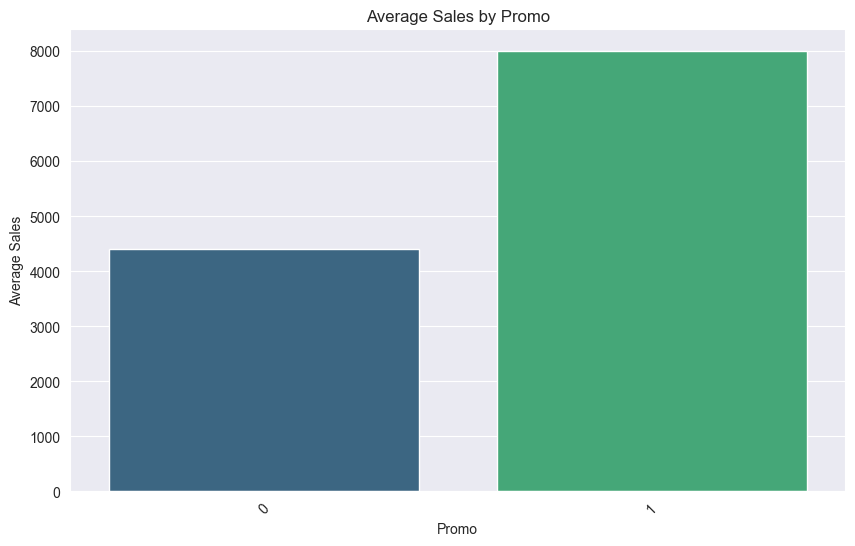

/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/2492033864.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_customers_by_promo.index, y=avg_sales_customers_by_promo['Customers'], palette='viridis')


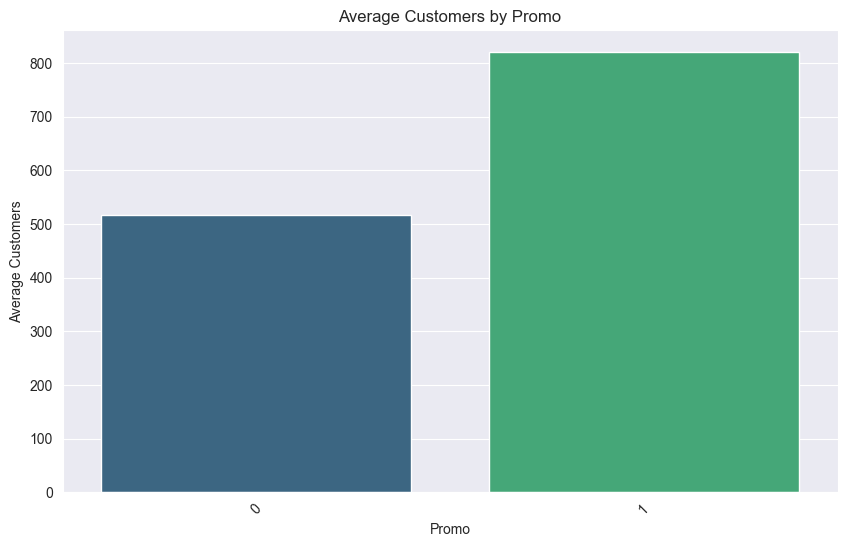

In [33]:
# Group by 'Promo' and calculate average sales and customers
avg_sales_customers_by_promo = merged_train.groupby('Promo')[['Sales', 'Customers']].mean()

# Plot average sales by promo
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_customers_by_promo.index, y=avg_sales_customers_by_promo['Sales'], palette='viridis')
plt.title('Average Sales by Promo')
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

# Plot average customers by promo
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_customers_by_promo.index, y=avg_sales_customers_by_promo['Customers'], palette='viridis')
plt.title('Average Customers by Promo')
plt.xlabel('Promo')
plt.ylabel('Average Customers')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Group by 'StateHoliday' and calculate average sales and customers
avg_sales_customers_by_state_holiday = merged_train.groupby('StateHoliday')[['Sales', 'Customers']].mean()


/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/1852190849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_customers_by_state_holiday.index, y=avg_sales_customers_by_state_holiday['Sales'], palette='viridis')


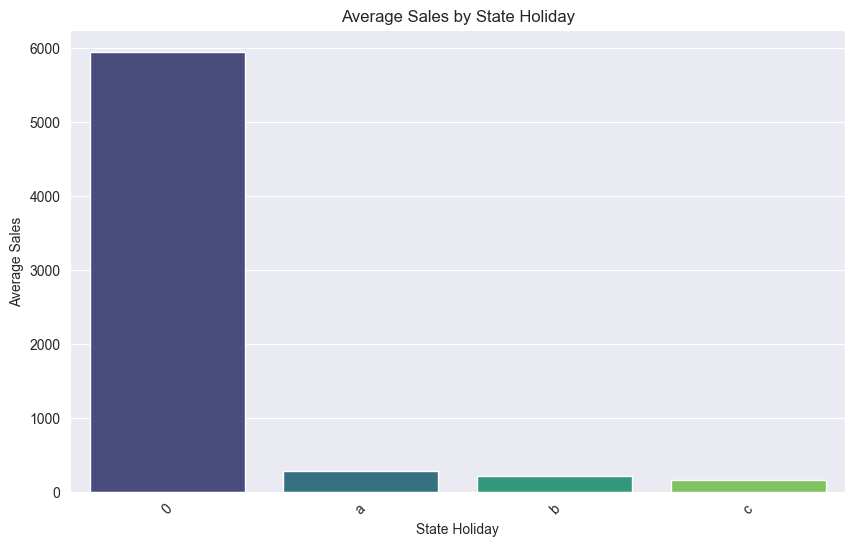

In [35]:
# Plot average sales by state holiday
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_customers_by_state_holiday.index, y=avg_sales_customers_by_state_holiday['Sales'], palette='viridis')
plt.title('Average Sales by State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()


/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/832595921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_customers_by_state_holiday.index, y=avg_sales_customers_by_state_holiday['Customers'], palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, '0'), Text(1, 0, 'a'), Text(2, 0, 'b'), Text(3, 0, 'c')])

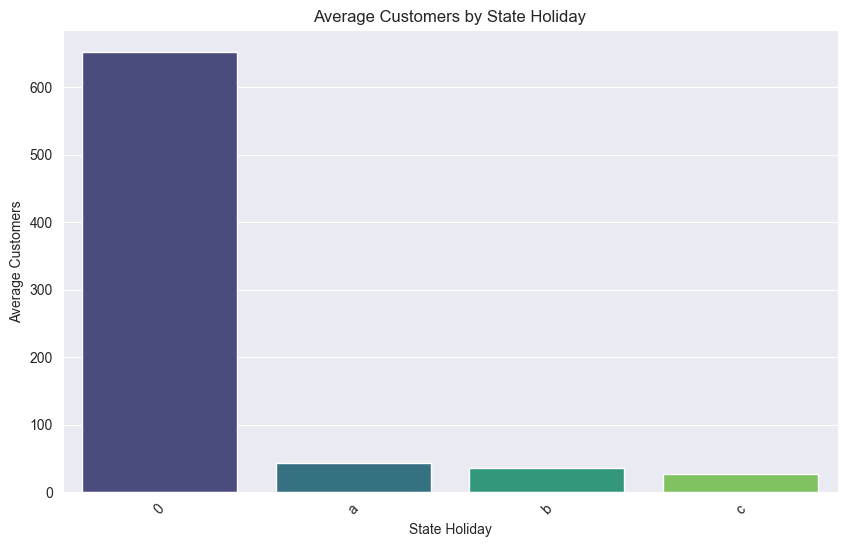

In [36]:
# Plot average customers by state holiday
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_customers_by_state_holiday.index, y=avg_sales_customers_by_state_holiday['Customers'], palette='viridis')
plt.title('Average Customers by State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Average Customers')
plt.xticks(rotation=45)


In [37]:
# Group by 'StoreType' and calculate average sales and customers
avg_sales_customers_by_store_type = merged_train.groupby('StoreType')[['Sales', 'Customers']].mean()


/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/4192792794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_customers_by_store_type.index, y=avg_sales_customers_by_store_type['Sales'], palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, 'a'), Text(1, 0, 'b'), Text(2, 0, 'c'), Text(3, 0, 'd')])

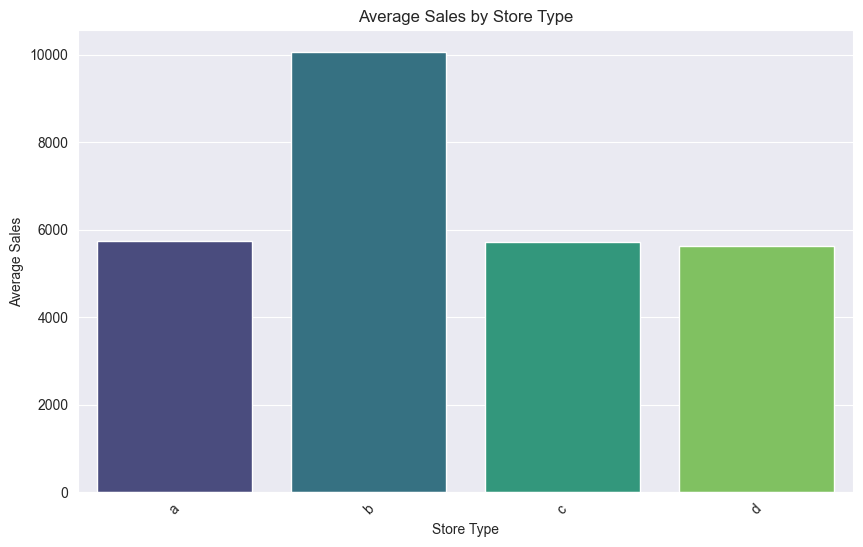

In [38]:
# Plot average sales by store type
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_customers_by_store_type.index, y=avg_sales_customers_by_store_type['Sales'], palette='viridis')
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)


/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/3234503656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_customers_by_store_type.index, y=avg_sales_customers_by_store_type['Customers'], palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, 'a'), Text(1, 0, 'b'), Text(2, 0, 'c'), Text(3, 0, 'd')])

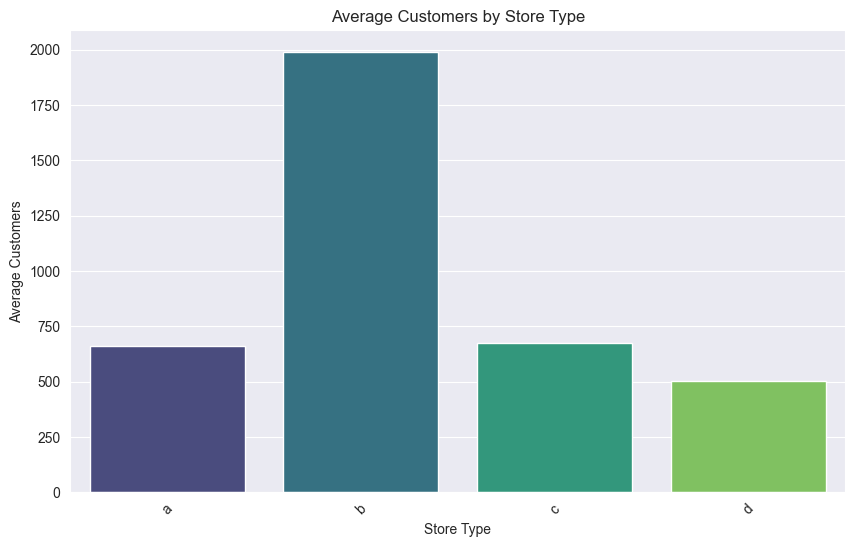

In [39]:
# Plot average customers by store type
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_customers_by_store_type.index, y=avg_sales_customers_by_store_type['Customers'], palette='viridis')
plt.title('Average Customers by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Customers')
plt.xticks(rotation=45)

/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/567603006.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Sales', data=merged_train, palette='viridis')


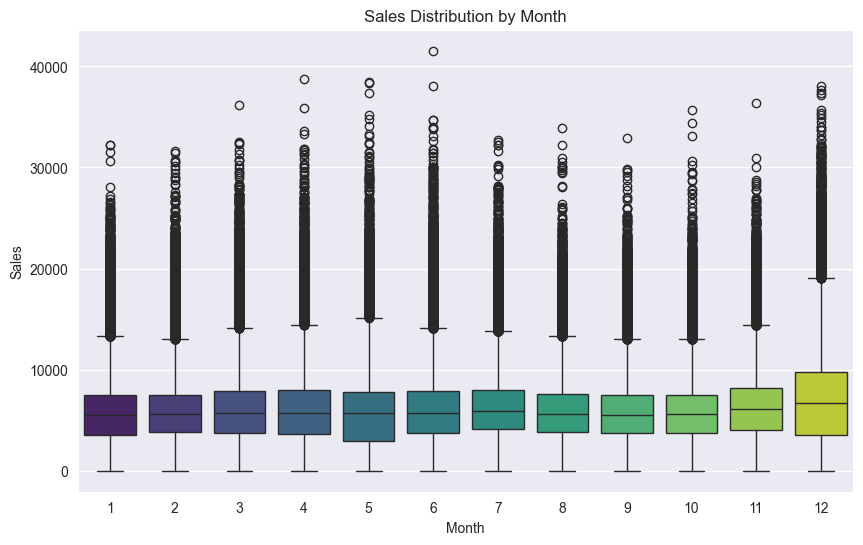

/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_76728/567603006.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Store', y='Sales', data=merged_train, palette='viridis')


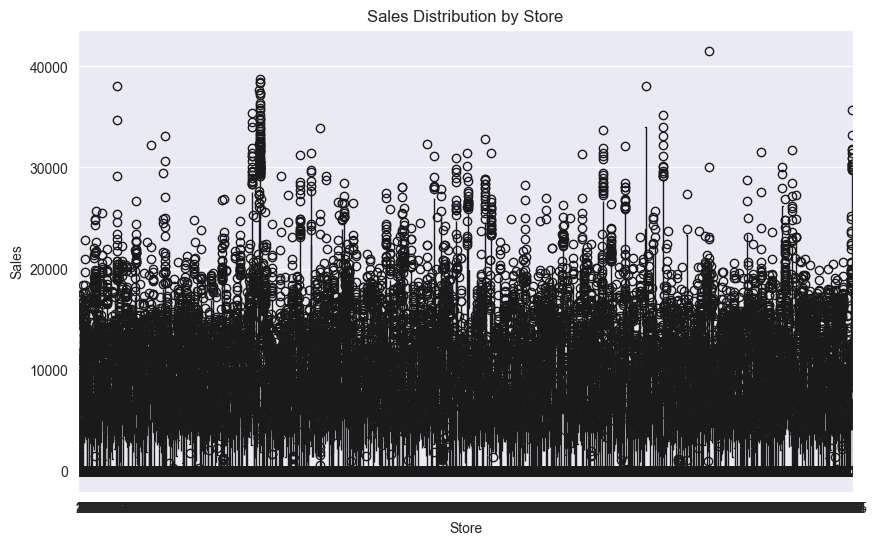

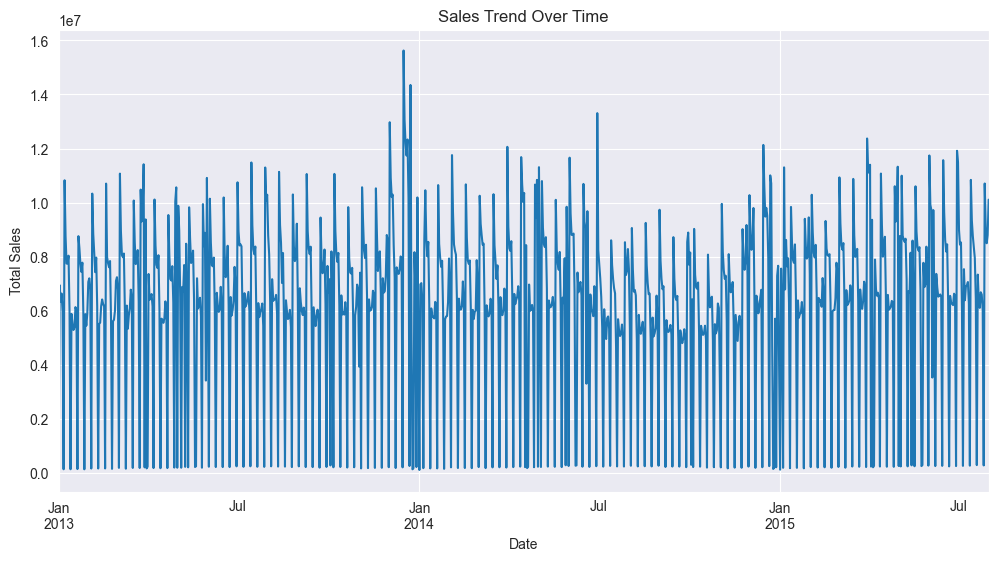

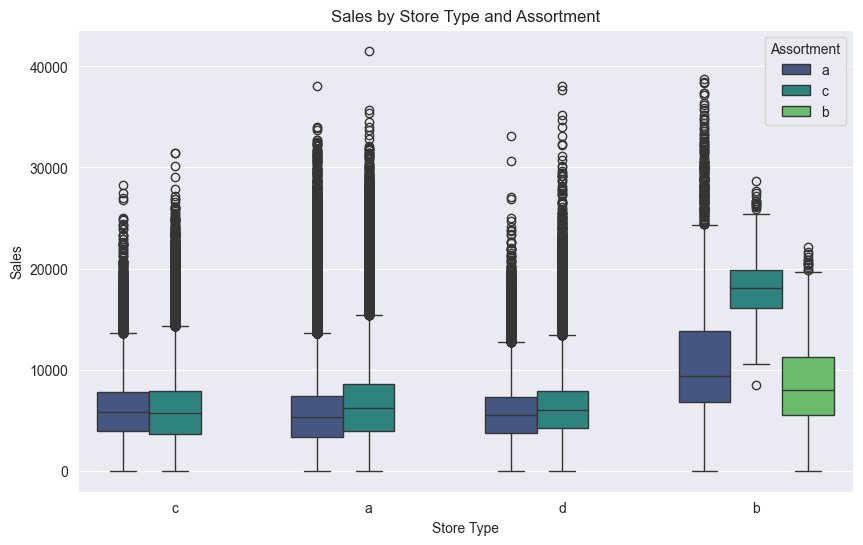

In [41]:
# Convert 'Date' column to datetime if it's not already
merged_train['Date'] = pd.to_datetime(merged_train['Date'])

# Extract month from the 'Date' column
merged_train['Month'] = merged_train['Date'].dt.month

# Sales Distribution by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Sales', data=merged_train, palette='viridis')
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Sales Distribution by Store
plt.figure(figsize=(10, 6))
sns.boxplot(x='Store', y='Sales', data=merged_train, palette='viridis')
plt.title('Sales Distribution by Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

# Sales Trend Over Time
plt.figure(figsize=(12, 6))
merged_train.groupby('Date')['Sales'].sum().plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Sales by Store Type and Assortment
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='Sales', hue='Assortment', data=merged_train, palette='viridis')
plt.title('Sales by Store Type and Assortment')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()